In [1]:
#import urllib.request
import http.client
import json
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


baseEndpoint = "localhost:8082" 
basePath = "/2d/scatter"
baseUri = baseEndpoint + basePath


def scatterPlot(x=100,y=100):
    relativePath = "{}?x={}&y={}".format(basePath,x,y)
    conn = http.client.HTTPConnection(baseEndpoint)
    conn.request("GET", relativePath)
    r1 = conn.getresponse()

    if (r1.status >= 400):
        print("Error:", relativePath, r1.status, r1.reason)
        return []
    else:
        payload = r1.read()
        jsonPayload = payload.decode('utf-8')
        return json.loads(jsonPayload)


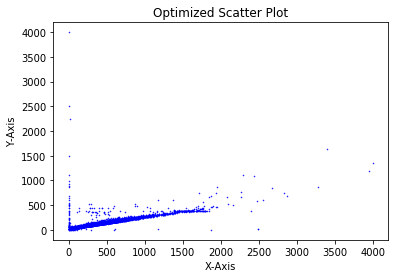

In [2]:
data = scatterPlot(4000,4000)

grid = np.array(data)
plt.scatter(grid[:,0], grid[:,1], c='b', marker='.', s=1)
plt.title('Optimized Scatter Plot')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.show()
plt.close()